In [10]:
# Import libraries
import pandas as pd

# Load datasets
customers = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project\data\Customers.csv")
products = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project\data\Products.csv")
transactions = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project\data\Transactions.csv")

# Display the first few rows of each dataset
print("Customers Dataset:")
display(customers.head())

print("Products Dataset:")
display(products.head())

print("Transactions Dataset:")
display(transactions.head())

# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Display the merged data to check
display(merged_data.head())

# Feature Engineering: Calculate total spending and transaction frequency
customer_behavior = merged_data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    transaction_frequency=('TransactionID', 'count'),
    average_transaction_value=('TotalValue', 'mean')
).reset_index()

# Check the head of the new data frame
display(customer_behavior.head())



Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


,CustomerID,total_spending,transaction_frequency,average_transaction_value
0,C0001,3354.52,5,670.904
1,C0002,1862.74,4,465.685
2,C0003,2725.38,4,681.345
3,C0004,5354.88,8,669.360
4,C0005,2034.24,3,678.080


In [11]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_behavior[['total_spending', 'transaction_frequency', 'average_transaction_value']])

# Convert scaled data back to a DataFrame for easy manipulation
scaled_data_df = pd.DataFrame(scaled_data, columns=['total_spending', 'transaction_frequency', 'average_transaction_value'])

display(scaled_data_df.head())


,total_spending,transaction_frequency,average_transaction_value
0,-0.061701,-0.011458,-0.070263
1,-0.877744,-0.467494,-0.934933
2,-0.405857,-0.467494,-0.026271
3,1.032547,1.356650,-0.076769
4,-0.783929,-0.923530,-0.040028


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Fit KMeans clustering (choosing 4 clusters as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_behavior['Segment'] = kmeans.fit_predict(scaled_data)

# Add cluster centers for analysis
cluster_centers = kmeans.cluster_centers_

# Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_behavior['Segment'])
display(f'Davies-Bouldin Index: {db_index}')


'Davies-Bouldin Index: 1.0604240399923033'

In [13]:
#Cluster Evaluation
from sklearn.metrics import silhouette_score

# Silhouette Score to evaluate clustering quality
sil_score = silhouette_score(scaled_data, customer_behavior['Segment'])
display(f'Silhouette Score: {sil_score}')

# Inertia: sum of squared distances of samples to their cluster center
inertia = kmeans.inertia_
display(f'Inertia: {inertia}')


'Silhouette Score: 0.3135106549790539'

'Inertia: 207.6972008349404'

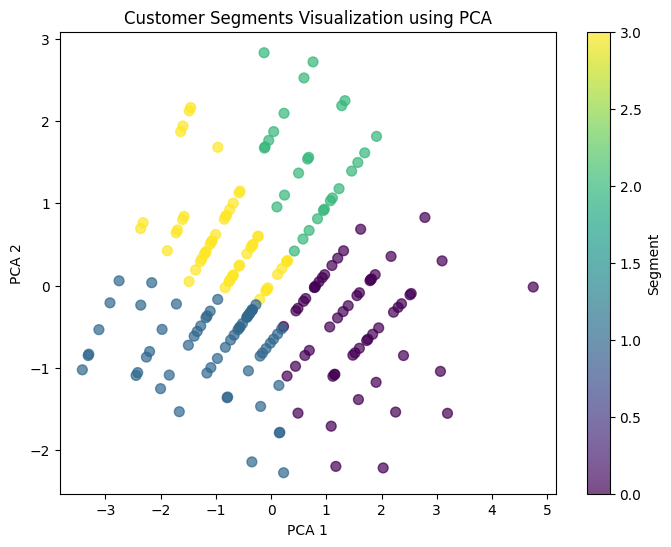

In [14]:
#Visualizing the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the DataFrame
customer_behavior['PCA1'] = pca_result[:, 0]
customer_behavior['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_behavior['PCA1'], customer_behavior['PCA2'], c=customer_behavior['Segment'], cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Segments Visualization using PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Segment')
plt.show()


In [16]:
# Save the clustering results to a CSV file
customer_behavior.to_csv('customer_segments.csv', index=False)
